In [1]:
import pandas as pd

In [3]:
dados = pd.read_csv('Admission_Predict.csv')
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dados.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
dados.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
x = dados.drop(['Serial No.','Chance of Admit '], axis = 1)
y = dados['Chance of Admit ']

In [11]:
x.shape

(400, 7)

In [8]:
from sklearn.model_selection import train_test_split

x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size=0.3, shuffle=True)

In [38]:
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,SGD,Adadelta

In [109]:
model = Sequential()
model.add(Dense(10,input_dim=7,kernel_initializer='normal', activation='relu'))
model.add(Dense(30,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(30,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,kernel_initializer='normal', activation='linear'))

otimizador = Adam(amsgrad=True)


model.compile(otimizador, 'mean_squared_error',metrics=['mean_squared_error'])

historico = model.fit(x_treino,y_treino,batch_size=400, epochs=1000, validation_data=(x_teste,y_teste), verbose = 1)

Epoch 1/1000
1/1 [==============================] - 0s 92ms/step - loss: 0.5595 - mean_squared_error: 0.5595 - val_loss: 0.5432 - val_mean_squared_error: 0.5432
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5337 - mean_squared_error: 0.5337 - val_loss: 0.5171 - val_mean_squared_error: 0.5171
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5093 - mean_squared_error: 0.5093 - val_loss: 0.5025 - val_mean_squared_error: 0.5025
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.4911 - mean_squared_error: 0.4911 - val_loss: 0.4855 - val_mean_squared_error: 0.4855
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4706 - mean_squared_error: 0.4706 - val_loss: 0.4650 - val_mean_squared_error: 0.4650
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4470 - mean_squared_error: 0.4470 - val_loss: 0.4441 - val_mean_squared_error: 0.4441
Epoch 7/1000
1/1 [===================

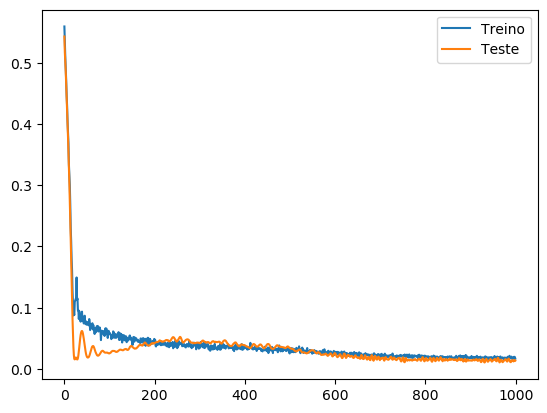

In [110]:
import matplotlib.pyplot as plt
plt.plot(historico.history['mean_squared_error'], label='Treino')
plt.plot(historico.history['val_mean_squared_error'], label='Teste')
plt.legend();

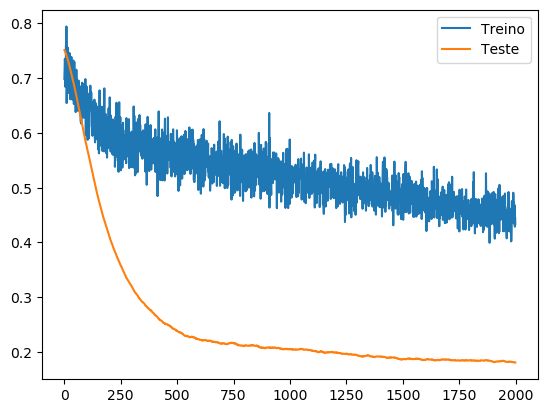

In [58]:
import matplotlib.pyplot as plt
plt.plot(historico.history['mae'], label='Treino')
plt.plot(historico.history['val_mae'], label='Teste')
plt.legend();